In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Defining independent variable as angles from 10deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])
x

array([0.17453293, 0.2268928 , 0.27925268, 0.33161256, 0.38397244,
       0.43633231, 0.48869219, 0.54105207, 0.59341195, 0.64577182,
       0.6981317 , 0.75049158, 0.80285146, 0.85521133, 0.90757121,
       0.95993109, 1.01229097, 1.06465084, 1.11701072, 1.1693706 ,
       1.22173048, 1.27409035, 1.32645023, 1.37881011, 1.43116999,
       1.48352986, 1.53588974, 1.58824962, 1.6406095 , 1.69296937,
       1.74532925, 1.79768913, 1.85004901, 1.90240888, 1.95476876,
       2.00712864, 2.05948852, 2.11184839, 2.16420827, 2.21656815,
       2.26892803, 2.32128791, 2.37364778, 2.42600766, 2.47836754,
       2.53072742, 2.58308729, 2.63544717, 2.68780705, 2.74016693,
       2.7925268 , 2.84488668, 2.89724656, 2.94960644, 3.00196631,
       3.05432619, 3.10668607, 3.15904595, 3.21140582, 3.2637657 ,
       3.31612558, 3.36848546, 3.42084533, 3.47320521, 3.52556509,
       3.57792497, 3.63028484, 3.68264472, 3.7350046 , 3.78736448,
       3.83972435, 3.89208423, 3.94444411, 3.99680399, 4.04916

In [8]:
#Setting seed for reproducability to add some noise in the dataset
np.random.seed(10)  

In [9]:
#Defining the target/dependent variable "y" as sin of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [11]:
#Creating Dataframe using Independent variable x and Dependent variable y
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

#Printing first 5 rows
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


In [14]:
#Plotting the dependent and Independent variables

plt.figure(figsize=(12,8),dpi=1020)
plt.plot(data['x'],data['y'],'.')

In [15]:
#adding more independent variables, polynomial regression with powers of x from 1 to 15. We will go from 2 to 16
#becasue x is power 1 and already independent variable present(we created)

for i in range(2,16):
    colname = 'x_%d'%i #new variable name will be x power
    data[colname]= data['x']**i
data.head()


,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


# Creating test and train dataset randomly

In [16]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

In [18]:
test

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
12,0.802851,0.574580,0.644570,0.517494,0.415471,0.333562,0.267800,0.215004,1.726162e-01,1.385852e-01,1.112633e-01,8.932791e-02,7.171705e-02,5.757813e-02,4.622669e-02,3.711316e-02
14,0.907571,0.822305,0.823686,0.747553,0.678458,0.615749,0.558836,0.507183,4.603050e-01,4.177596e-01,3.791466e-01,3.441025e-01,3.122975e-01,2.834322e-01,2.572349e-01,2.334590e-01
16,1.012291,0.677558,1.024733,1.037328,1.050078,1.062984,1.076049,1.089275,1.102663e+00,1.116216e+00,1.129935e+00,1.143823e+00,1.157882e+00,1.172114e+00,1.186520e+00,1.201103e+00
17,1.064651,0.894890,1.133481,1.206762,1.284780,1.367842,1.456274,1.550424,1.650660e+00,1.757377e+00,1.870992e+00,1.991954e+00,2.120735e+00,2.257842e+00,2.403814e+00,2.559222e+00
19,1.169371,0.758534,1.367428,1.599030,1.869858,2.186557,2.556896,2.989959,3.496370e+00,4.088552e+00,4.781033e+00,5.590799e+00,6.537716e+00,7.645013e+00,8.939853e+00,1.045400e+01
23,1.378810,1.339372,1.901117,2.621280,3.614247,4.983360,6.871108,9.473953,1.306278e+01,1.801110e+01,2.483388e+01,3.424121e+01,4.721212e+01,6.509655e+01,8.975578e+01,1.237562e+02
24,1.431170,1.158822,2.048248,2.931390,4.195318,6.004213,8.593050,12.298115,1.760069e+01,2.518958e+01,3.605058e+01,5.159450e+01,7.384050e+01,1.056783e+02,1.512436e+02,2.164553e+02
25,1.483530,1.247088,2.200861,3.265043,4.843789,7.185905,10.660505,15.815177,2.346229e+01,3.480700e+01,5.163723e+01,7.660537e+01,1.136464e+02,1.685978e+02,2.501198e+02,3.710602e+02


# Linear Regression

In [19]:
#importing linear regression model from Scikit_learn
from sklearn.linear_model import LinearRegression as LR

In [20]:
#Seperating train and test for dependent and independent variables manually

X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error 0.21314430958173888
Testing Error 0.189740331181654


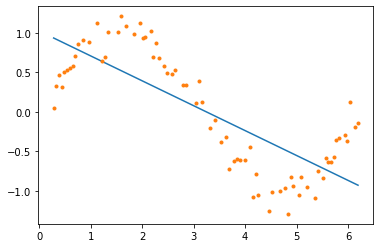

In [21]:
#Building linear regression model with just one feature
independent_variable_train = X_train[:,0:1]

linreg = LR(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Error 0.02147248177096575
Testing Error 0.03045187888196925


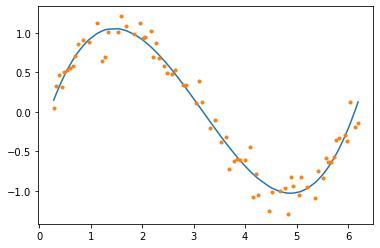

In [22]:
#Building linear regression model with just three feature
independent_variable_train = X_train[:,0:3]

linreg = LR(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Error 0.01876956728313285
Testing Error 0.03151259909954008


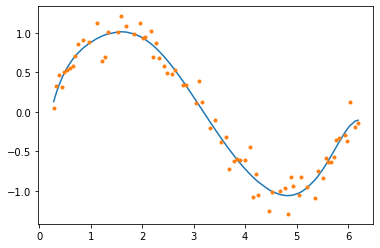

In [23]:
#Building linear regression model with just eight feature
independent_variable_train = X_train[:,0:8]

linreg = LR(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:8]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [25]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LR(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [26]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [27]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

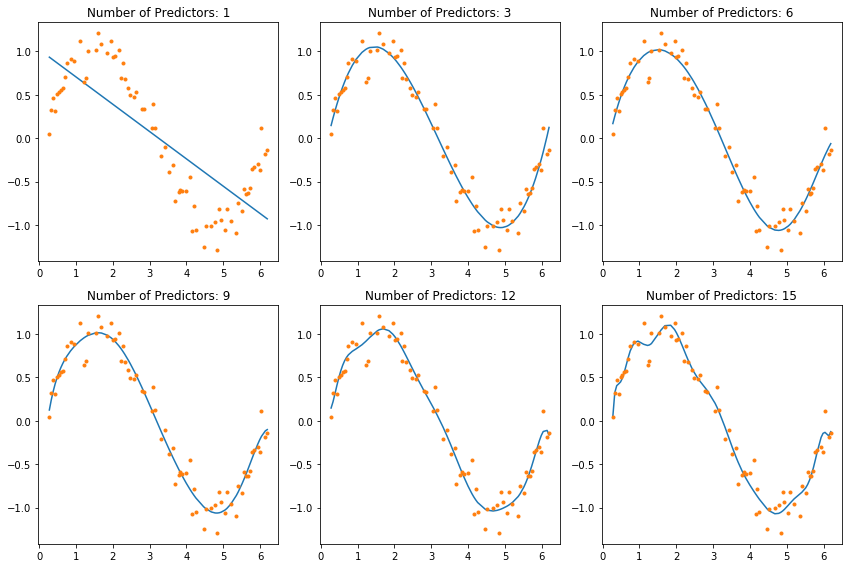

In [33]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [34]:
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.213144,0.18974,1.02203,-0.314825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.211909,0.187095,1.10861,-0.394472,0.0123777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.0214725,0.0304519,-0.395777,2.21126,-0.985564,0.103652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.0214327,0.0304953,-0.429469,2.29758,-1.04224,0.117041,-0.00103554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.0197698,0.0234493,-0.0964951,1.19654,0.00841208,-0.292937,0.0686808,-0.00429043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.0190963,0.0279155,-0.402994,2.46092,-1.64453,0.655694,-0.197059,0.0313909,-0.00183749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.0190951,0.0277173,-0.383432,2.36451,-1.48422,0.532799,-0.147927,0.0208088,-0.000674424,-5.11492e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.0187696,0.0315126,-0.848928,5.05968,-7.01727,5.98535,-3.07647,0.923889,-0.160126,0.0149197,-0.000579131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.0187643,0.0321764,-0.938864,5.65497,-8.46606,7.73247,-4.26288,1.40643,-0.279989,0.032718,-0.00202927,4.98416e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.0182366,0.044286,-2.3796,16.2596,-38.0228,49.7017,-38.7544,18.9306,-5.95289,1.20408,-0.151285,0.0107395,-0.000329055,NaN,NaN,NaN,NaN,NaN


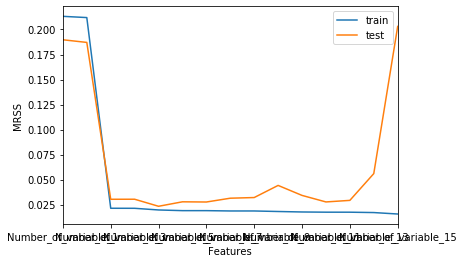

In [38]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

# Ridge Regression

Now we will penalise cost function using Ridge Regularisation

In [39]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [49]:
#Choose different values of Alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10,20,25]

In [50]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [51]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [52]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

C:\Users\capre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44253e-18): result may not be accurate.
  overwrite_a=True).T


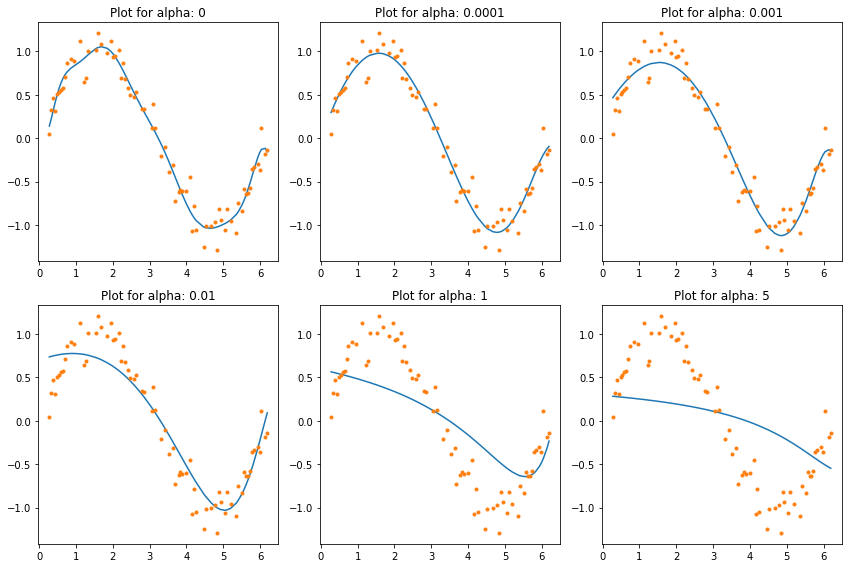

In [53]:
#Iterate over the 15 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [54]:
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.0175427,0.029506,0.788464,-9.84491,45.6282,-89.55,96.5495,-61.8217,23.659,-4.89079,0.221068,0.138196,-0.0320975,0.00191741,0.000262299,-5.09378e-05,3.12183e-06,-6.49044e-08
alpha_1e-08,0.0187423,0.0276611,-0.368905,2.29961,-1.3585,0.38797,-0.0591402,-0.00369502,0.000940914,0.000217027,1.46867e-05,-3.20144e-06,-1.1375e-06,-1.51389e-07,3.85956e-09,6.13928e-09,1.05301e-09,-1.86278e-10
alpha_0.0001,0.0200603,0.0256572,-0.022686,1.24699,-0.358717,-0.022629,0.00155818,0.000584144,8.98696e-05,9.41337e-06,5.50393e-07,-4.11232e-08,-1.9808e-08,-3.94783e-09,-5.59723e-10,-5.29939e-11,9.22312e-14,1.60391e-12
alpha_0.001,0.0275236,0.0341765,0.27937,0.72424,-0.187515,-0.0207419,-0.000681951,0.000187615,5.24971e-05,8.96633e-06,1.224e-06,1.37466e-07,1.13465e-08,1.75038e-10,-1.98412e-10,-6.00354e-11,-1.2727e-11,-2.31125e-12
alpha_0.01,0.0592707,0.0578867,0.696265,0.165401,-0.0748105,-0.0107353,-0.000852418,-1.65127e-06,1.56107e-05,4.01527e-06,7.39345e-07,1.14619e-07,1.53221e-08,1.66733e-09,1.0435e-10,-1.37721e-11,-7.61576e-12,-2.148e-12
alpha_1,0.193549,0.198239,0.591519,-0.0932591,-0.0127685,-0.00163307,-0.000192936,-2.07185e-05,-1.87851e-06,-1.01282e-07,1.12443e-08,5.57489e-09,1.41197e-09,2.97676e-10,5.75543e-11,1.05846e-11,1.88458e-12,3.28093e-13
alpha_5,0.346553,0.365762,0.293575,-0.0363647,-0.00492445,-0.000663207,-8.65405e-05,-1.09453e-05,-1.33345e-06,-1.53831e-07,-1.61486e-08,-1.37733e-09,-4.77262e-11,1.71818e-11,6.33255e-12,1.53278e-12,3.20862e-13,6.23808e-14
alpha_10,0.402107,0.424487,0.199704,-0.0217364,-0.00299161,-0.000415388,-5.66112e-05,-7.59705e-06,-1.00477e-06,-1.30669e-07,-1.6617e-08,-2.04562e-09,-2.39312e-10,-2.56035e-11,-2.25891e-12,-9.40932e-14,2.39866e-14,9.55936e-15
alpha_20,0.44738,0.470245,0.126951,-0.0124635,-0.00174533,-0.000248903,-3.51188e-05,-4.92069e-06,-6.86517e-07,-9.54521e-08,-1.32217e-08,-1.82252e-09,-2.49575e-10,-3.38728e-11,-4.54185e-12,-5.98957e-13,-7.71687e-14,-9.61001e-15
alpha_25,0.460028,0.482646,0.107844,-0.0103313,-0.00145385,-0.000208799,-2.97178e-05,-4.20713e-06,-5.94087e-07,-8.37707e-08,-1.17962e-08,-1.65793e-09,-2.32363e-10,-3.24359e-11,-4.50298e-12,-6.20563e-13,-8.4694e-14,-1.14109e-14


In [55]:
coef_matrix_ridge['mrss_train']

alpha_0         0.0175427
alpha_1e-08     0.0187423
alpha_0.0001    0.0200603
alpha_0.001     0.0275236
alpha_0.01      0.0592707
alpha_1          0.193549
alpha_5          0.346553
alpha_10         0.402107
alpha_20          0.44738
alpha_25         0.460028
Name: mrss_train, dtype: object

In [56]:
coef_matrix_ridge['mrss_test'].shape

(10,)

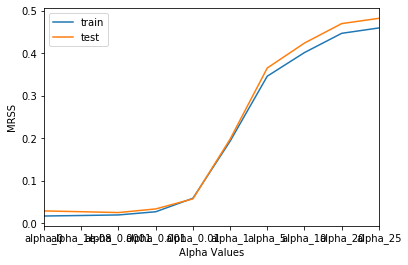

In [57]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [58]:
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [60]:
#Printing number of zeros in each row of the coefficients dataset, No variable is dropped
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

# LASSO

In [61]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [62]:
#Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [67]:
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LR(normalize=True)
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret

In [68]:
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [69]:
#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

C:\Users\capre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7335671573239131, tolerance: 0.003983065126185541
  positive)
C:\Users\capre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7333330322073063, tolerance: 0.003983065126185541
  positive)
C:\Users\capre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5377192887699753, tolerance: 0.003983065126185541
  positive)
C:\Users\capre\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: Conver

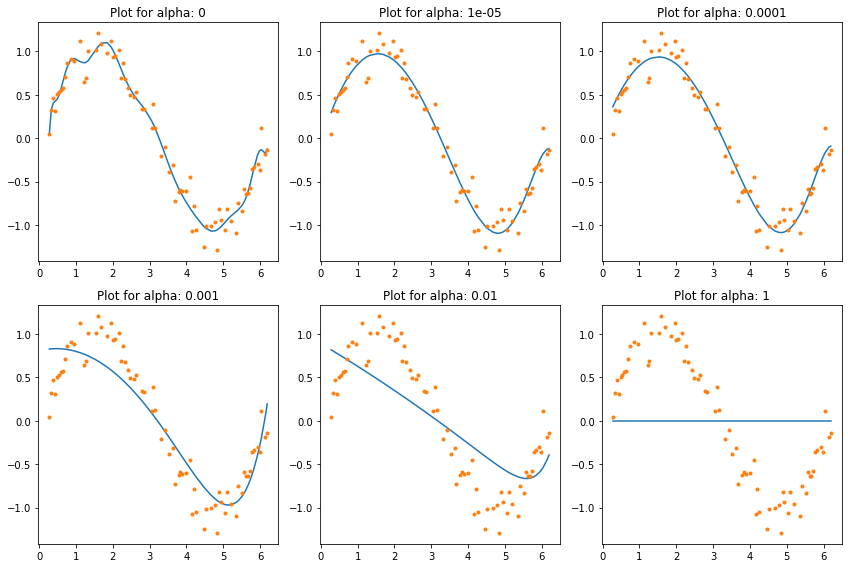

In [70]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

In [71]:
coef_matrix_lasso

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.0157305,0.203072,-24.7039,273.275,-1264.58,3285.22,-5365.48,5882.77,-4515.08,2492.58,-1006.08,299.03,-65.3128,10.3487,-1.15664,0.0864153,-0.0038718,7.86465e-05
alpha_1e-10,0.0200978,0.0265054,-0.0543862,1.35355,-0.444862,-0.00355953,0.00225451,0.000385568,4.74643e-05,4.99497e-06,4.47932e-07,2.87736e-08,-4.00456e-10,-6.34826e-10,-1.66052e-10,-3.38571e-11,-6.25036e-12,-1.09754e-12
alpha_1e-08,0.020098,0.0265055,-0.0543729,1.35353,-0.444854,-0.00355917,0.00225421,0.000385578,4.74649e-05,4.99493e-06,4.47911e-07,2.87685e-08,-4.00244e-10,-6.33921e-10,-1.66066e-10,-3.3861e-11,-6.25104e-12,-1.09765e-12
alpha_1e-05,0.0202644,0.0266324,-0.0408209,1.32969,-0.436982,-0.00318377,0.00195226,0.000395609,4.80901e-05,4.96235e-06,4.26812e-07,2.36114e-08,0,-0,-1.40024e-10,-3.79795e-11,-6.96619e-12,-1.2122e-12
alpha_0.0001,0.0221185,0.0271748,0.071009,1.14879,-0.38281,-0,0,0.000422014,5.92557e-05,5.36434e-06,3.09377e-07,0,0,0,-0,-0,-2.80785e-12,-2.62212e-12
alpha_0.001,0.0795629,0.0716657,0.806597,0.106174,-0.112407,-0,-0,0,0,0,9.62885e-07,7.09873e-08,0,0,0,0,0,0
alpha_0.01,0.178755,0.168055,0.889474,-0.252438,-0.0088148,-0,-0,-0,0,0,0,0,0,0,0,0,0,8.13738e-13
alpha_1,0.545625,0.563375,-0.00300388,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.545625,0.563375,-0.00300388,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.545625,0.563375,-0.00300388,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


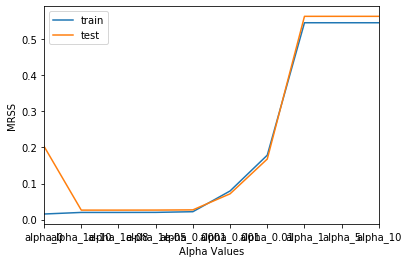

In [72]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [73]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0          0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      2
alpha_0.0001     7
alpha_0.001     11
alpha_0.01      12
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

You can see that it started to drop coefficients. That is for Alpha = 0.0001 it dropped 7 co-efficients